In [1]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
#%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format



/home/cristobal/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cristobal/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cristobal/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cristobal/anaconda3/lib/python3.5/site-packages/tensorflow/python/f

## Load Boston Data

In [2]:
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np
boston=load_boston()


In [3]:
dboston=pd.DataFrame(data=boston['data'], columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'])
targetboston=pd.DataFrame(data=boston['target'],columns=['target'])
dboston['target']=targetboston['target']

In [4]:
targetboston.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
dboston=dboston.reindex(np.random.permutation(dboston.index))
dboston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
94,0.0,28.0,15.0,0.0,0.5,6.2,77.3,3.6,4.0,270.0,18.2,396.9,10.6,20.6
104,0.1,0.0,8.6,0.0,0.5,6.2,90.0,2.4,5.0,384.0,20.9,392.7,12.3,20.1
472,3.6,0.0,18.1,0.0,0.6,6.4,75.0,2.9,24.0,666.0,20.2,393.4,14.4,23.2
146,2.2,0.0,19.6,0.0,0.9,5.6,100.0,1.5,5.0,403.0,14.7,169.3,16.6,15.6
147,2.4,0.0,19.6,0.0,0.9,4.9,95.7,1.5,5.0,403.0,14.7,391.7,29.5,14.6


In [6]:
targetboston2=pd.DataFrame()

In [7]:
targetboston2=dboston[['target']]

In [8]:
targetboston2.head()

,target
94,20.6
104,20.1
472,23.2
146,15.6
147,14.6


## Explore data

In [9]:
dboston.shape

(506, 14)

In [10]:
dboston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6,11.4,11.1,0.1,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6,23.3,6.9,0.3,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,0.1,0.0,5.2,0.0,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,0.3,0.0,9.7,0.0,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.6,12.5,18.1,0.0,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


In [11]:
dboston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 94 to 331
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 59.3 KB


In [12]:
dboston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
          ..
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
Length: 14, dtype: int64

In [13]:
dboston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.0,-0.2,0.4,-0.1,0.4,-0.2,0.4,-0.4,0.6,0.6,0.3,-0.4,0.5,-0.4
ZN,-0.2,1.0,-0.5,-0.0,-0.5,0.3,-0.6,0.7,-0.3,-0.3,-0.4,0.2,-0.4,0.4
INDUS,0.4,-0.5,1.0,0.1,0.8,-0.4,0.6,-0.7,0.6,0.7,0.4,-0.4,0.6,-0.5
CHAS,-0.1,-0.0,0.1,1.0,0.1,0.1,0.1,-0.1,-0.0,-0.0,-0.1,0.0,-0.1,0.2
NOX,0.4,-0.5,0.8,0.1,1.0,-0.3,0.7,-0.8,0.6,0.7,0.2,-0.4,0.6,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAX,0.6,-0.3,0.7,-0.0,0.7,-0.3,0.5,-0.5,0.9,1.0,0.5,-0.4,0.5,-0.5
PTRATIO,0.3,-0.4,0.4,-0.1,0.2,-0.4,0.3,-0.2,0.5,0.5,1.0,-0.2,0.4,-0.5
B,-0.4,0.2,-0.4,0.0,-0.4,0.1,-0.3,0.3,-0.4,-0.4,-0.2,1.0,-0.4,0.3
LSTAT,0.5,-0.4,0.6,-0.1,0.6,-0.6,0.6,-0.5,0.5,0.5,0.4,-0.4,1.0,-0.7


In [14]:
dboston2=dboston[['INDUS', 'RM',
        'TAX', 'PTRATIO','LSTAT']]

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

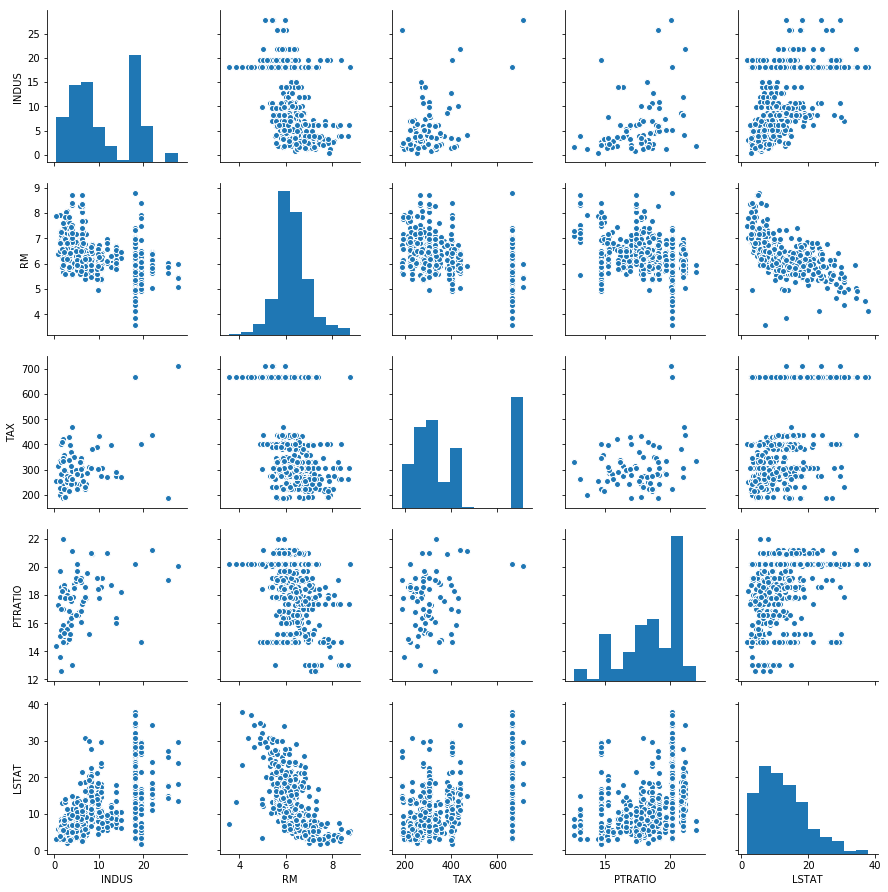

In [16]:
sns.pairplot(dboston2)
plt.show()

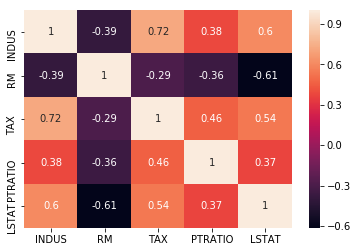

In [17]:
sns.heatmap(dboston2.corr(),annot=True)
plt.show()

In [18]:
def preprocess_features(dboston):
    selected_features=dboston[['INDUS', 'RM',
        'TAX', 'PTRATIO','LSTAT']]
    preprocess_features=selected_features.copy()
    return preprocess_features
def preprocess_targets(tb):
    output_targets=pd.DataFrame()
    output_targets['target']=tb['target']
    return output_targets


In [19]:
training_examples=preprocess_features(dboston.head(400))
training_targets=preprocess_targets(targetboston2.head(400))
validation_examples=preprocess_features(dboston.tail(105))
validation_targets=preprocess_targets(targetboston2.tail(105))

In [20]:
training_examples[['TAX']].head()
display.display(targetboston2.head())

,target
94,20.6
104,20.1
472,23.2
146,15.6
147,14.6


In [21]:
print('training')
display.display(training_examples.describe())
print('training targets')
display.display(training_targets.describe())
print('validation')
display.display(validation_examples.describe())
display.display(validation_targets.describe())

training


,INDUS,RM,TAX,PTRATIO,LSTAT
count,400.0,400.0,400.0,400.0,400.0
mean,11.2,6.3,411.1,18.4,12.7
std,7.0,0.7,170.0,2.2,7.2
min,0.5,3.6,187.0,12.6,1.7
25%,5.0,5.9,279.0,17.0,7.1
50%,9.8,6.2,337.0,19.0,11.6
75%,18.1,6.6,666.0,20.2,17.1
max,27.7,8.8,711.0,22.0,38.0


training targets


,target
count,400.0
mean,22.3
std,9.0
min,5.0
25%,16.5
50%,20.9
75%,25.0
max,50.0


validation


,INDUS,RM,TAX,PTRATIO,LSTAT
count,105.0,105.0,105.0,105.0,105.0
mean,10.8,6.3,397.4,18.5,12.4
std,6.4,0.7,164.1,2.2,7.1
min,1.3,4.5,188.0,13.0,2.5
25%,6.1,5.9,284.0,17.4,6.9
50%,8.1,6.2,307.0,19.1,10.9
75%,18.1,6.7,437.0,20.2,15.9
max,27.7,8.7,711.0,22.0,37.0


,target
count,105.0
mean,23.4
std,10.1
min,5.0
25%,18.0
50%,22.0
75%,26.7
max,50.0


## check correlations with TF

In [22]:
training_targets.head()

,target
94,20.6
104,20.1
472,23.2
146,15.6
147,14.6


In [23]:
corr_DF=training_examples.copy()
corr_DF['target']=training_targets['target']
corr_DF.corr()

,INDUS,RM,TAX,PTRATIO,LSTAT,target
INDUS,1.0,-0.4,0.7,0.4,0.6,-0.5
RM,-0.4,1.0,-0.3,-0.3,-0.6,0.7
TAX,0.7,-0.3,1.0,0.5,0.5,-0.5
PTRATIO,0.4,-0.3,0.5,1.0,0.4,-0.5
LSTAT,0.6,-0.6,0.5,0.4,1.0,-0.7
target,-0.5,0.7,-0.5,-0.5,-0.7,1.0


## construct feature columns

In [24]:
def construct_feature_columns(input_features):
    return set([tf.feature_column.numeric_column(my_feature) for my_feature in input_features])

In [25]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    features={key:np.array(value) for key, value in dict(features).items()}
    ds=Dataset.from_tensor_slices((features, targets))
    ds=ds.batch(batch_size).repeat(num_epochs)
    if shuffle:
        ds=ds.shuffle(10000)
    features, labels=ds.make_one_shot_iterator().get_next()
    return features, labels

In [37]:
def train_model(learning_rate, steps, batch_size, training_examples, training_targets, validation_examples, validation_targets):
    periods=10
    steps_per_period=steps/periods
    my_optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
   # my_optimizer=tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    optimizer2 = tf.train.ProximalAdagradOptimizer(learning_rate=learning_rate,l1_regularization_strength=0.001)
   # optimizer2 = tf.contrib.estimator.clip_gradients_by_norm(optimizer2, 5.0)
    
    linear_regressor=tf.estimator.LinearRegressor(feature_columns=construct_feature_columns(training_examples), optimizer=optimizer2,config=tf.estimator.RunConfig(keep_checkpoint_max=1))
    
    training_input_fn=lambda : my_input_fn(training_examples,training_targets['target'], batch_size=batch_size)
    predict_training_input_fn=lambda: my_input_fn(training_examples, training_targets['target'],num_epochs=1, shuffle=False)
    predict_validation_input_fn=lambda: my_input_fn(validation_examples,validation_targets['target'],num_epochs=1, shuffle=False)
    print('training')
    train_rmse_l=[]
    validation_rmse_l=[]
    for period in range(0,periods):
        linear_regressor.train(input_fn=training_input_fn, steps=steps_per_period)
        training_predictions=linear_regressor.predict(input_fn=predict_training_input_fn)
        training_predictions=np.array([item['predictions'][0] for item in training_predictions])
        validation_predictions=linear_regressor.predict(input_fn=predict_validation_input_fn)
        validation_predictions=np.array([item['predictions'] for item in validation_predictions])
        tra_rmse=math.sqrt(metrics.mean_squared_error(training_predictions, training_targets))
        val_rmse=math.sqrt(metrics.mean_squared_error(validation_predictions, validation_targets))
        print('period %02d : %0.2f' %  (period, tra_rmse))
        train_rmse_l.append(tra_rmse)
        validation_rmse_l.append(val_rmse)
        print('Finish training')
    
    plt.ylabel('RMSE')
    plt.xlabel('periods')
    plt.title('RMSE vs Periods')
    plt.tight_layout()
    plt.plot(train_rmse_l, label='training')
    plt.plot(validation_rmse_l,label='validation')
    plt.legend()
    plt.show()
    return linear_regressor

training
period 00 : 24.02
Finish training
period 01 : 24.01
Finish training
period 02 : 24.00
Finish training
period 03 : 24.00
Finish training
period 04 : 23.99
Finish training
period 05 : 23.99
Finish training
period 06 : 23.98
Finish training
period 07 : 23.98
Finish training
period 08 : 23.97
Finish training
period 09 : 23.97
Finish training


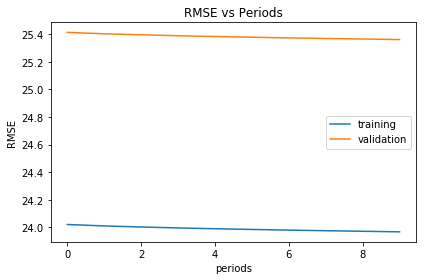

In [38]:
_=train_model(learning_rate=.00001, steps=100, batch_size=10, training_examples=training_examples, training_targets=training_targets, validation_examples=validation_examples, validation_targets=validation_targets)